In [39]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#r'C:\Users\Gabriel Benga\Documents\Python\TCC\TCC\TCC\Datasets\df1-banco com varias posicoes de mao com diferentes ambientes tbm

In [3]:
# Definir os diretórios de treino e teste
base_dir = r'C:\Users\Gabriel Benga\Documents\Python\TCC\TCC\TCC\Datasets\df1-banco com varias posicoes de mao com diferentes ambientes tbm'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [22]:
# Definir as classes
classes = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
    'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'
]
num_classes = len(classes)


In [23]:
# Configurar geradores de dados
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 34714 images belonging to 21 classes.
Found 11548 images belonging to 21 classes.


In [24]:
# Verificar a correspondência de classes
print("Classes encontradas pelo gerador de treino:", train_generator.class_indices)
print("Classes encontradas pelo gerador de validação:", validation_generator.class_indices)


Classes encontradas pelo gerador de treino: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'I': 7, 'L': 8, 'M': 9, 'N': 10, 'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'U': 17, 'V': 18, 'W': 19, 'Y': 20}
Classes encontradas pelo gerador de validação: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'I': 7, 'L': 8, 'M': 9, 'N': 10, 'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'U': 17, 'V': 18, 'W': 19, 'Y': 20}


In [30]:
# Definir a arquitetura do modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(21, activation='softmax')  # Ajuste o número 25 para o número correto de classes
])

In [31]:
# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Configurar EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [35]:
# Treinar o modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=3,
    callbacks=[early_stopping]
)


Epoch 1/3
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 69s 64ms/step - accuracy: 0.9735 - loss: 0.0798 - val_accuracy: 0.9951 - val_loss: 0.0128
Epoch 2/3
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 0s 53us/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0424
Epoch 3/3
1084/1084 ━━━━━━━━━━━━━━━━━━━━ 68s 62ms/step - accuracy: 0.9765 - loss: 0.0725 - val_accuracy: 0.9981 - val_loss: 0.0060


In [36]:
# Avaliar o modelo
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')


361/361 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9960 - loss: 0.0118
Test accuracy: 0.9950640797615051


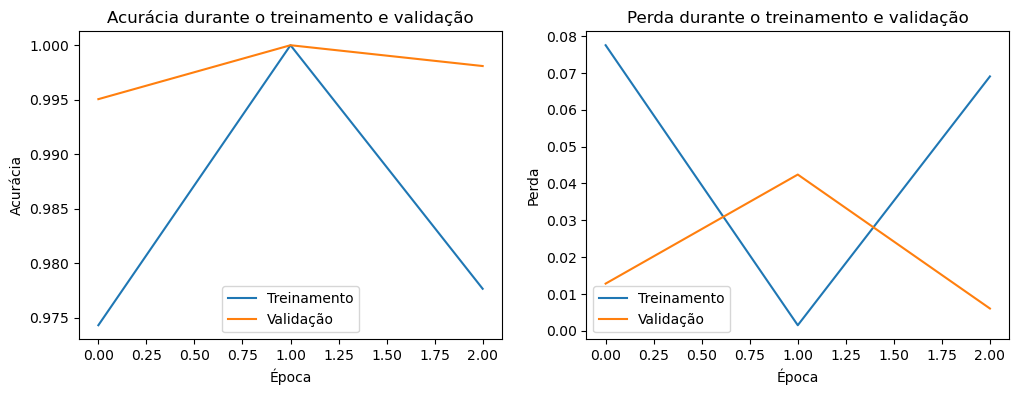

In [40]:
import matplotlib.pyplot as plt

# Plotar precisão de treinamento e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento e validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Plotar perda de treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento e validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.show()


In [41]:
# Salvar o modelo
model.save('teste1°_libras.h5')


In [43]:
# Carregar o modelo salvo
model_carregado = tf.keras.models.load_model('teste1°_libras.h5')


In [47]:
# Função para carregar e preparar a imagem
def preparar_imagem(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Caminho da nova imagem
img_path = r'C:\Users\Gabriel Benga\Downloads\img-test-a.jfif'  # Corrigido o caminho

# Preparar a imagem
img_preparada = preparar_imagem(img_path)

# Fazer previsão
predicao = model_carregado.predict(img_preparada)
classe_predita = np.argmax(predicao, axis=1)
print(f'Classe predita: {classes[classe_predita[0]]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Classe predita: P
